In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
# df = pd.read_excel('cleansing_multi_category.xlsx')
df = pd.read_csv('range_4_option_a.csv')

In [3]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,B,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,B,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Get Shorty (1995),Comedy|Crime|Thriller,B,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,C,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,A,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0


In [120]:
df.shape

(569, 22)

In [4]:
df.isnull().sum()

title          0
genres         0
rating         0
action         0
film-noir      0
imax           0
crime          0
fantasy        0
children       0
comedy         0
musical        0
horror         0
animation      0
adventure      0
mystery        0
romance        0
documentary    0
thriller       0
war            0
sci-fi         0
drama          0
western        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

title          object
genres         object
rating         object
action          int64
film-noir       int64
imax            int64
crime           int64
fantasy         int64
children        int64
comedy          int64
musical         int64
horror          int64
animation       int64
adventure       int64
mystery         int64
romance         int64
documentary     int64
thriller        int64
war             int64
sci-fi          int64
drama           int64
western         int64
dtype: object

In [7]:
df.rating.value_counts()

B    192
A    166
D    120
C     91
Name: rating, dtype: int64

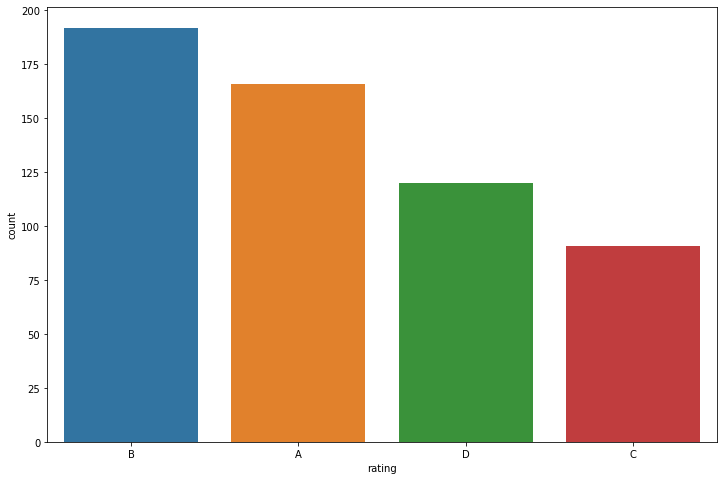

In [8]:
plt.figure(figsize=(12, 8))

sns.countplot(x=df.rating, order=df.rating.value_counts().index)

plt.show()

In [9]:
df.corr()

,action,film-noir,imax,crime,fantasy,children,comedy,musical,horror,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
action,1.000000,-0.102653,0.077933,0.090246,-0.065443,-0.137026,-0.145619,-0.150761,-0.046211,-0.059856,0.203290,-0.068915,-0.122224,-0.074136,0.092524,0.102328,0.196211,-0.113395,0.043799
film-noir,-0.102653,1.000000,-0.044037,0.155806,-0.098658,-0.083018,-0.145073,-0.064417,-0.072718,-0.084260,-0.100810,0.170586,-0.021915,-0.026603,0.146457,-0.051227,-0.073926,0.004295,-0.043070
imax,0.077933,-0.044037,1.000000,-0.027980,0.083013,-0.006334,-0.107688,-0.002082,-0.044455,-0.008399,0.182054,-0.058217,-0.064914,0.043477,-0.016743,-0.051227,0.109860,-0.066034,-0.043070
crime,0.090246,0.155806,-0.027980,1.000000,-0.157127,-0.142177,-0.003331,-0.108826,-0.040606,-0.145346,-0.138242,0.178451,-0.101208,-0.058538,0.223512,-0.032548,-0.140426,0.094565,-0.071326
fantasy,-0.065443,-0.098658,0.083013,-0.157127,1.000000,0.267693,0.075063,0.083469,-0.089145,0.246842,0.214061,-0.081214,0.038818,-0.059601,-0.148885,-0.094954,-0.037200,-0.084073,-0.096492
children,-0.137026,-0.083018,-0.006334,-0.142177,0.267693,1.000000,0.132904,0.208214,-0.137087,0.465207,0.282363,-0.112863,-0.077108,-0.050152,-0.211867,-0.096572,-0.047685,-0.149884,-0.081195
comedy,-0.145619,-0.145073,-0.107688,-0.003331,0.075063,0.132904,1.000000,0.082428,-0.130259,0.070122,-0.016662,-0.122603,0.152603,-0.027414,-0.242163,-0.070908,-0.131662,-0.245241,-0.103734
musical,-0.150761,-0.064417,-0.002082,-0.108826,0.083469,0.208214,0.082428,1.000000,-0.106373,0.202860,-0.032260,-0.104135,0.150223,0.011295,-0.173699,-0.047742,-0.108826,-0.075075,0.000615
horror,-0.046211,-0.072718,-0.044455,-0.040606,-0.089145,-0.137087,-0.130259,-0.106373,1.000000,-0.106281,-0.173578,0.043571,-0.150261,-0.043930,0.214785,-0.059933,0.019096,-0.118085,-0.071121
animation,-0.059856,-0.084260,-0.008399,-0.145346,0.246842,0.465207,0.070122,0.202860,-0.106281,1.000000,0.191259,-0.115704,-0.069010,-0.050903,-0.191629,-0.075956,0.054965,-0.136996,-0.082411


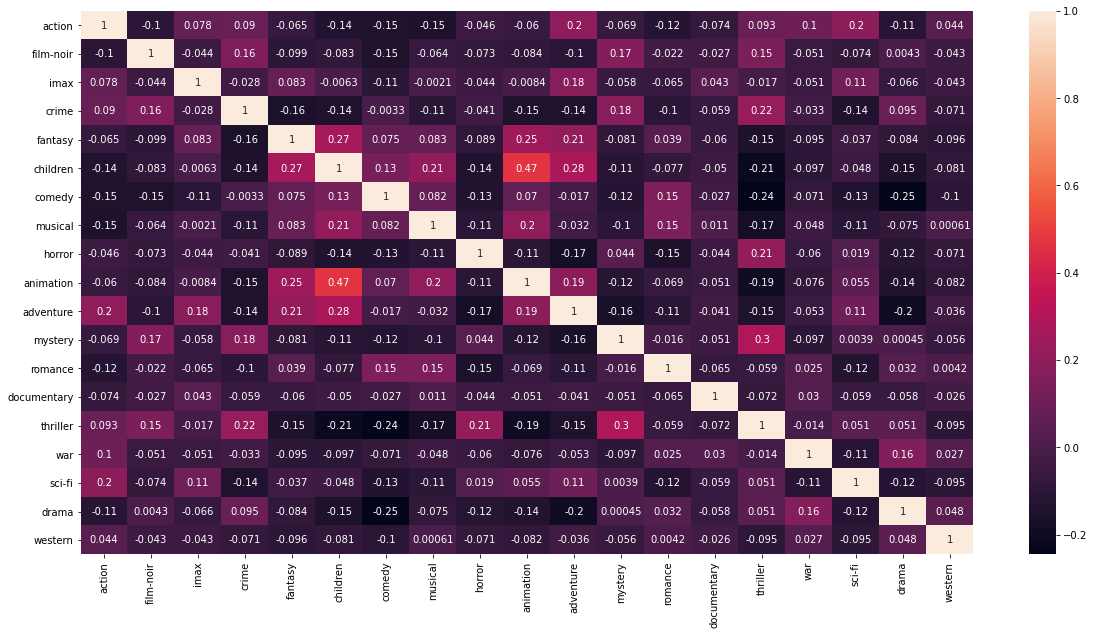

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

plt.show()

In [11]:
df.head(2)

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,B,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,B,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
X = df.drop(columns=['title', 'genres', 'rating'])


In [13]:
X.columns

Index(['action', 'film-noir', 'imax', 'crime', 'fantasy', 'children', 'comedy',
       'musical', 'horror', 'animation', 'adventure', 'mystery', 'romance',
       'documentary', 'thriller', 'war', 'sci-fi', 'drama', 'western'],
      dtype='object')

In [14]:
X.head()

,action,film-noir,imax,crime,fantasy,children,comedy,musical,horror,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0


In [15]:
X.shape

(569, 19)

In [16]:
y = df.iloc[:, 2]

In [17]:
y.dtype

dtype('O')

In [18]:
# pip install imbalanced-learn

In [19]:
y.value_counts()

B    192
A    166
D    120
C     91
Name: rating, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy='minority')

X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [21]:
y_oversampled.value_counts()

C    192
B    192
A    166
D    120
Name: rating, dtype: int64

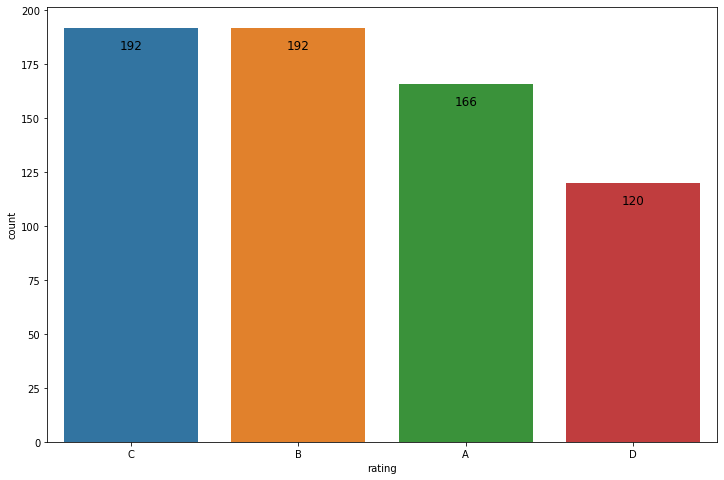

In [22]:
plt.figure(figsize=(12, 8))

sns.countplot(x=y_oversampled, order=y_oversampled.value_counts().index)

for x, data in enumerate(y_oversampled.value_counts()):
    plt.text(x, data-10, f'{data}', ha='center', fontsize=12)

plt.show()

In [23]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y = le.fit_transform(y)

In [24]:
from sklearn.preprocessing import LabelBinarizer

le = LabelBinarizer()
y_oversampled = le.fit_transform(y_oversampled)

In [25]:
print(y_oversampled)

[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


In [26]:
# import collections, numpy
# a = numpy.array(y)
# counter = collections.Counter(a)
# print(counter)

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=0)

In [116]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import Activation

model = Sequential(
    [
        Flatten(input_shape=(19,)),
        Dense(32, activation="relu", name="layer2"),
        Dense(64, activation="relu", name="layer3"),
#         Dense(128, activation="relu", name="layer4"),
        Dropout(0.3),
        Dense(4, activation = "softmax", name="layer7"),
    ]
)

In [117]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 19)                0         
                                                                 
 layer2 (Dense)              (None, 32)                640       
                                                                 
 layer3 (Dense)              (None, 64)                2112      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 layer7 (Dense)              (None, 4)                 260       
                                                                 
Total params: 3,012
Trainable params: 3,012
Non-trainable params: 0
_________________________________________________________________


In [118]:
from tensorflow.keras.optimizers import Adam

print("[INFO] training network...")
opt = Adam(learning_rate=1e-2, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=32)

[INFO] training network...
Epoch 1/250
15/15 [==============================] - 0s 11ms/step - loss: 1.2828 - accuracy: 0.3923 - val_loss: 1.1631 - val_accuracy: 0.5174
Epoch 2/250
15/15 [==============================] - 0s 5ms/step - loss: 1.0803 - accuracy: 0.5544 - val_loss: 1.1032 - val_accuracy: 0.5224
Epoch 3/250
15/15 [==============================] - 0s 4ms/step - loss: 0.9721 - accuracy: 0.5906 - val_loss: 1.0771 - val_accuracy: 0.5323
Epoch 4/250
15/15 [==============================] - 0s 5ms/step - loss: 0.9171 - accuracy: 0.6205 - val_loss: 1.0161 - val_accuracy: 0.5721
Epoch 5/250
15/15 [==============================] - 0s 5ms/step - loss: 0.8675 - accuracy: 0.6525 - val_loss: 0.9757 - val_accuracy: 0.6219
Epoch 6/250
15/15 [==============================] - 0s 4ms/step - loss: 0.7836 - accuracy: 0.6866 - val_loss: 0.9684 - val_accuracy: 0.6169
Epoch 7/250
15/15 [==============================] - 0s 5ms/step - loss: 0.7655 - accuracy: 0.6994 - val_loss: 0.9590 - val_ac

15/15 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.9680 - val_loss: 2.2304 - val_accuracy: 0.6816
Epoch 59/250
15/15 [==============================] - 0s 4ms/step - loss: 0.1078 - accuracy: 0.9574 - val_loss: 2.0836 - val_accuracy: 0.6915
Epoch 60/250
15/15 [==============================] - 0s 4ms/step - loss: 0.1198 - accuracy: 0.9574 - val_loss: 2.1677 - val_accuracy: 0.6915
Epoch 61/250
15/15 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9659 - val_loss: 2.2238 - val_accuracy: 0.6965
Epoch 62/250
15/15 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 0.9595 - val_loss: 2.2546 - val_accuracy: 0.6866
Epoch 63/250
15/15 [==============================] - 0s 6ms/step - loss: 0.1139 - accuracy: 0.9595 - val_loss: 2.1673 - val_accuracy: 0.6816
Epoch 64/250
15/15 [==============================] - 0s 7ms/step - loss: 0.1179 - accuracy: 0.9552 - val_loss: 2.4133 - val_accuracy: 0.6766
Epoch 65/250
15/15 

Epoch 116/250
15/15 [==============================] - 0s 4ms/step - loss: 0.1003 - accuracy: 0.9616 - val_loss: 3.0590 - val_accuracy: 0.6866
Epoch 117/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0810 - accuracy: 0.9659 - val_loss: 3.1941 - val_accuracy: 0.6915
Epoch 118/250
15/15 [==============================] - 0s 6ms/step - loss: 0.0993 - accuracy: 0.9574 - val_loss: 3.3456 - val_accuracy: 0.7114
Epoch 119/250
15/15 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9638 - val_loss: 3.1545 - val_accuracy: 0.6567
Epoch 120/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9616 - val_loss: 3.2683 - val_accuracy: 0.6716
Epoch 121/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9638 - val_loss: 3.3060 - val_accuracy: 0.7065
Epoch 122/250
15/15 [==============================] - 0s 5ms/step - loss: 0.1016 - accuracy: 0.9680 - val_loss: 3.0306 - val_accuracy: 0.6915

15/15 [==============================] - 0s 6ms/step - loss: 0.0861 - accuracy: 0.9723 - val_loss: 4.1925 - val_accuracy: 0.6965
Epoch 174/250
15/15 [==============================] - 0s 6ms/step - loss: 0.1194 - accuracy: 0.9552 - val_loss: 3.9819 - val_accuracy: 0.7015
Epoch 175/250
15/15 [==============================] - 0s 4ms/step - loss: 0.1048 - accuracy: 0.9638 - val_loss: 3.7381 - val_accuracy: 0.6866
Epoch 176/250
15/15 [==============================] - 0s 6ms/step - loss: 0.0672 - accuracy: 0.9744 - val_loss: 3.8290 - val_accuracy: 0.7065
Epoch 177/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9851 - val_loss: 3.8119 - val_accuracy: 0.6915
Epoch 178/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9701 - val_loss: 3.6804 - val_accuracy: 0.6766
Epoch 179/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9787 - val_loss: 3.7426 - val_accuracy: 0.6716
Epoch 180/250

15/15 [==============================] - 0s 5ms/step - loss: 0.0745 - accuracy: 0.9701 - val_loss: 4.9385 - val_accuracy: 0.6766
Epoch 231/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9765 - val_loss: 4.9113 - val_accuracy: 0.6816
Epoch 232/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0478 - accuracy: 0.9808 - val_loss: 4.8136 - val_accuracy: 0.6915
Epoch 233/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.9765 - val_loss: 4.9164 - val_accuracy: 0.6766
Epoch 234/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0655 - accuracy: 0.9744 - val_loss: 4.9791 - val_accuracy: 0.6816
Epoch 235/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9701 - val_loss: 5.0402 - val_accuracy: 0.6915
Epoch 236/250
15/15 [==============================] - 0s 5ms/step - loss: 0.0648 - accuracy: 0.9765 - val_loss: 5.0110 - val_accuracy: 0.6866
Epoch 237/250

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


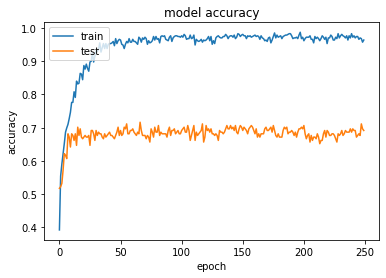

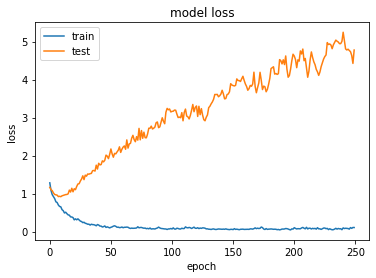

In [119]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()